In [1]:
import pandas as pd

In [2]:
import gensim
from gensim.models import Word2Vec, KeyedVectors   


In [3]:
from gensim.models import phrases

In [62]:
df=pd.read_csv("full_meta.csv")

In [63]:
df["title"]=df["title"].str.lower()

In [64]:
df=df.set_index("title")

In [65]:
df["has_ft"]["cohort succession explains most change in literary culture"]=1

C:\Users\lucia\AppData\Local\Temp\ipykernel_9680\3804413159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["has_ft"]["cohort succession explains most change in literary culture"]=1


In [66]:
df["has_ft"]["the spine of american law"]=1

C:\Users\lucia\AppData\Local\Temp\ipykernel_9680\3072290039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["has_ft"]["the spine of american law"]=1


In [67]:
df["has_ft"]["redlining_culture"]=1

C:\Users\lucia\AppData\Local\Temp\ipykernel_9680\1283275205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["has_ft"]["redlining_culture"]=1


In [68]:
df["has_ft"]["distant horizons"]=1

C:\Users\lucia\AppData\Local\Temp\ipykernel_9680\2802389838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["has_ft"]["distant horizons"]=1


In [69]:
df=df[df["has_ft"]==1]

In [284]:
texts=[]
for t in df["text"]:
    texts.append(t.split(" "))

In [285]:
bigrams = phrases.Phrases(texts)

In [300]:
model = Word2Vec(bigrams[texts], vector_size=100, window=25, min_count=5, workers=8)


In [301]:
model.wv.save_word2vec_format('model.bin', binary=True)


In [366]:
temp=df[(df["literature"]>0.75) & (df["information resources"]<0.3)]
texts=[]
for t in temp["text"]:
    texts.append(t.split(" "))
model = Word2Vec(bigrams[texts], vector_size=100, window=25, min_count=5, workers=6)
model.wv.save_word2vec_format('embed/'+"lit-info"+'.bin', binary=True)


In [385]:
df[df["psychology"]>0.75]

,Unnamed: 0,date,author,text,arts,philosophy,literature,applied philosophy,information science,computer science,...,mathematical objects,judicial system,technology,year,has_ft,goog,goog ngram,hathi,ia,gute
title,,,,,,,,,,,,,,,,,,,,,
co-work between university teachers: is it possible to build a common language?,335,2014-10-13 00:00:00+00:00,"['Dulce Pacheco', 'Luísa Soares']",paper cowork between university teachers is it...,0.056599,0.334259,0.180050,0.225751,0.174087,0.308202,...,0.012569,0.006073,0.990484,2014,1,0,0,0,0,1
twentieth century morality: the rise and fall of moral concepts from 1900 to 2007.,419,2019-10-05 09:59:17+00:00,"[{'name': 'Melissa A Wheeler'}, {'name': 'Mela...",click through the plos taxonomy to find articl...,0.054495,0.399125,0.055762,0.318022,0.283966,0.105111,...,0.019627,0.011549,0.027510,2019,1,0,1,0,0,0
the reception of ivan sikorsky’s scientific studies in the west,423,2021-06-15 10:29:09+00:00,"[{'orcid_id': '', 'affiliation': 'National Uni...",google scholar google google scholar google s...,0.473731,0.473886,0.248197,0.255277,0.036236,0.030426,...,0.021663,0.005826,0.012928,2021,1,1,0,0,1,0
competências dos profissionais de apoio à família: contributos de uma revisão de livros e manuais,430,2022-07-09 01:20:44+00:00,[{'affiliation': 'Universidade da Madeira e Ce...,family support services are characterized by a...,0.173818,0.161338,0.104734,0.122214,0.064116,0.230576,...,0.009200,0.008099,0.056408,2022,1,1,0,0,0,0
mnemonics for diagnostic criteria of dsm v mental disorders: a scoping review,431,2020-05-22 10:30:03+00:00,"[{'affiliation': 'Department of Psychiatry, Al...",article text pdf a multitude of psychiatric di...,0.076733,0.062662,0.085134,0.040609,0.045877,0.150045,...,0.008366,0.011139,0.013775,2020,1,1,0,0,0,0
"the seven words you can never say on television: increases in the use of swear words in american books, 1950-2008",450,2019-06-13 17:00:06+00:00,"[{'affiliation': 'San Diego State University, ...",httpsdoiorg sage open julyseptember the aut...,0.133878,0.074921,0.185623,0.120702,0.600619,0.086320,...,0.008387,0.002605,0.039198,2019,1,0,1,0,0,0
the full spectrum of clinical ethical issues in kidney failure. findings of a systematic qualitative review.,573,2016-06-15 05:36:54+00:00,"[{'name': 'Hannes Kahrass'}, {'name': 'Daniel ...",research article the full spectrum of clinical...,0.013700,0.078814,0.018982,0.070314,0.068415,0.068848,...,0.008979,0.021378,0.010894,2016,1,1,0,0,0,0
wordnet-feelings: a linguistic categorisation of human feelings,755,2018-11-06 15:42:17+00:00,"[{'name': 'Advaith Siddharthan'}, {'name': 'Ni...",wordnetfeelings a linguistic categorisation of...,0.038371,0.201351,0.062625,0.064858,0.051494,0.288574,...,0.007327,0.006293,0.022021,2018,1,0,1,0,0,0
citation analysis of phd theses with data from scopus and google books,8149,2021-10-24 00:00:00+00:00,['P. Donner'],vol scientometrics httpsdoiorgsw citation ...,0.020819,0.066527,0.014162,0.045748,0.163549,0.796667,...,0.018266,0.008657,0.014170,2021,1,1,0,0,0,0


In [312]:
for s in list(df.columns)[4:-7]:
    temp=df[df[s]>0.75]
    texts=[]
    for t in temp["text"]:
        texts.append(t.split(" "))
    model = Word2Vec(bigrams[texts], vector_size=100, window=25, min_count=5, workers=6)
    model.wv.save_word2vec_format('embed/'+s+'.bin', binary=True)

    

RuntimeError: you must first build vocabulary before training the model

In [431]:
model=KeyedVectors.load_word2vec_format('model.bin', binary=True, unicode_errors='ignore')


In [44]:
model=KeyedVectors.load_word2vec_format('embed/lit-info.bin', binary=True, unicode_errors='ignore')


In [45]:
keys=["google_ngram","google_books",  "hathitrust", "project_gutenberg", "internet_archive"]
matches=["tool", "methodology", "book", "text", "source", "library", "citation", "data"]

In [46]:
model.similarity(k, m)

0.97925955

In [47]:
spec = pd.DataFrame(0, index=keys, columns=matches)


In [48]:
for k in keys:
    for m in matches:
        try:
            spec[m][k]=model.similarity(k, m)
        except:
            spec[m][k]=0

C:\Users\lucia\AppData\Local\Temp\ipykernel_18908\823247271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spec[m][k]=model.similarity(k, m)


In [49]:
import seaborn as sns

In [50]:
model.most_similar('hathitrust', topn=100)

[('syllabus', 0.9970582127571106),
 ('johnson', 0.996247410774231),
 ('references', 0.9961493611335754),
 ('reconciliation', 0.995976448059082),
 ('dynamics', 0.9957383871078491),
 ('shakespeare', 0.9957131743431091),
 ('cognition', 0.994878888130188),
 ('jill', 0.9948347210884094),
 ('literacy', 0.9948247671127319),
 ('libraries', 0.9946321249008179),
 ('verso', 0.9944380521774292),
 ('undergraduate', 0.9944272637367249),
 ('herrero', 0.9943685531616211),
 ('learning', 0.9942898750305176),
 ('mit', 0.9941452741622925),
 ('janet', 0.9937886595726013),
 ('rise', 0.993762195110321),
 ('tenayuca', 0.9937354922294617),
 ('quoted', 0.9935364723205566),
 ('ghani', 0.9933550953865051),
 ('english_poetry', 0.9932257533073425),
 ('labyrinth', 0.9932059645652771),
 ('dalmia', 0.9931918382644653),
 ('cc', 0.9931755661964417),
 ('gratwick', 0.9931081533432007),
 ('williams', 0.9930068850517273),
 ('litera_ture', 0.9928520321846008),
 ('gender', 0.9928338527679443),
 ('madrid', 0.9926430583000183),

<Axes: >

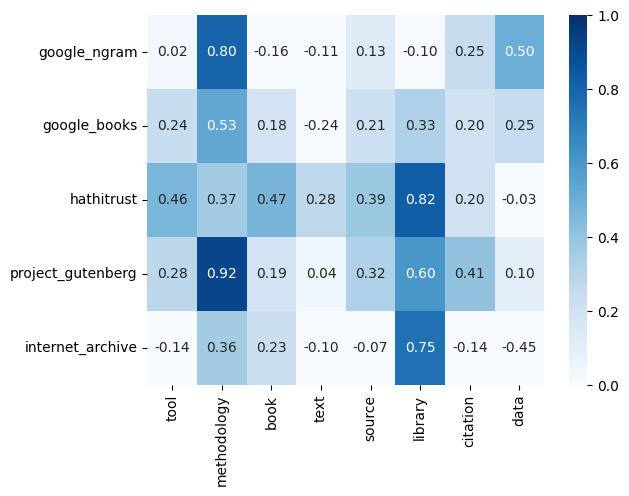

In [15]:
sns.heatmap(spec, cmap="Blues", vmin=0, vmax=1, annot=True,fmt='.2f')

In [374]:
model=KeyedVectors.load_word2vec_format('embed/psychology.bin', binary=True, unicode_errors='ignore')


In [375]:
model

In [381]:
keys=["google_ngram","google_books",  ]
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=20):
        used_words.append(similar_word)
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [382]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


In [383]:
from adjustText import adjust_text

C:\Users\lucia\AppData\Local\Temp\ipykernel_9680\3949868120.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


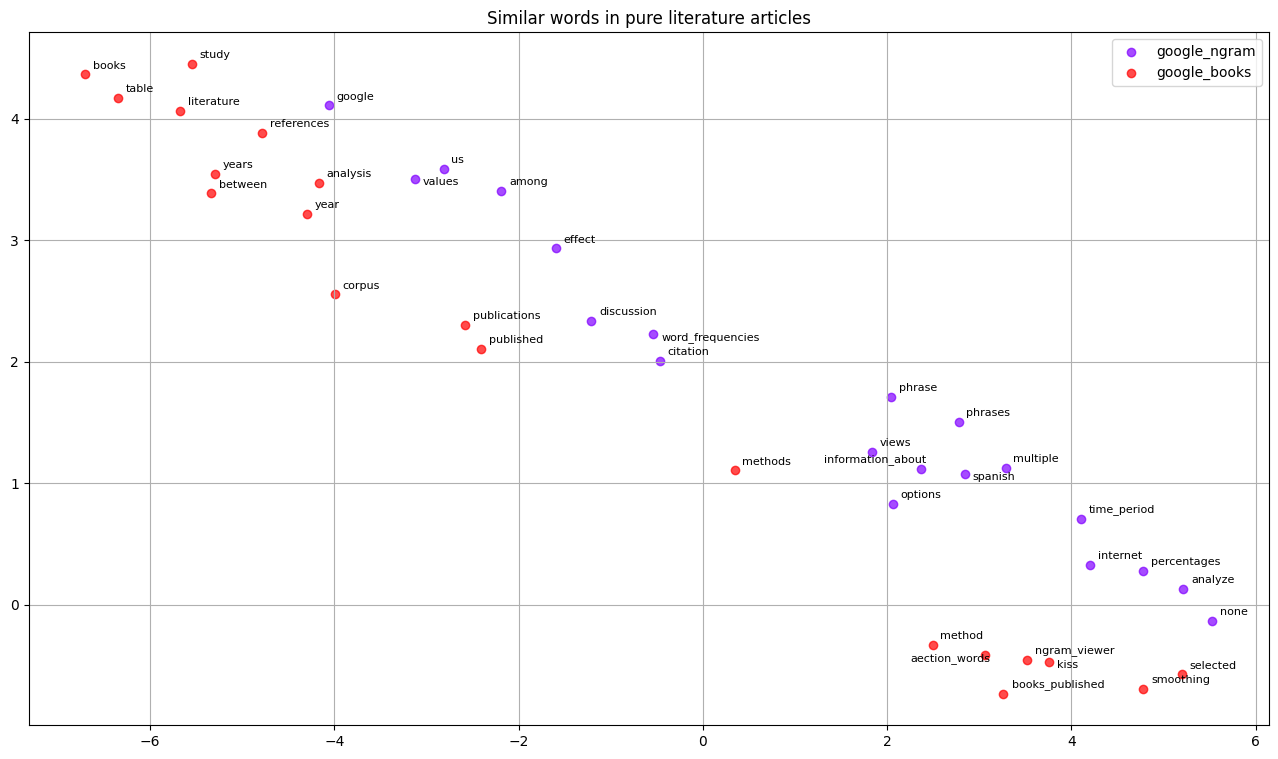

In [384]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    texts=[]

    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            texts.append(plt.annotate(word, alpha=1, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8))
    adjust_text(texts)
    plt.legend()
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words in pure literature articles', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [158]:
model=KeyedVectors.load_word2vec_format('embed/linguistics.bin', binary=True, unicode_errors='ignore')


In [246]:
sims = model.most_similar('google_ngram', topn=100)

In [242]:
sims = model.most_similar('hathitrust', topn=100)

In [250]:
sims = model.most_similar('internet_archive', topn=100)

In [249]:
sims = model.most_similar('project_gutenberg', topn=100)

In [251]:
sims

[('hierarchies', 0.9940171837806702),
 ('anno', 0.992946445941925),
 ('repository', 0.992874026298523),
 ('mike', 0.9916198253631592),
 ('google_books', 0.9912949204444885),
 ('posner', 0.9912675619125366),
 ('com', 0.9912243485450745),
 ('11', 0.99116051197052),
 ('cosmopolitan', 0.991094708442688),
 ('foster', 0.9910942912101746),
 ('pm_page', 0.9910343885421753),
 ('0', 0.9910131096839905),
 ('breitingers', 0.9909759759902954),
 ('norms', 0.9908236861228943),
 ('978', 0.9904767274856567),
 ('documentary', 0.990402340888977),
 ('modernist', 0.9900587201118469),
 ('cf_jacobs', 0.9897596836090088),
 ('overview', 0.9897412061691284),
 ('al', 0.9897003173828125),
 ('magazines', 0.9896907210350037),
 ('machine_learning', 0.9896402359008789),
 ('gottscheds', 0.9896141886711121),
 ('dichtkunst', 0.9894545078277588),
 ('festivals', 0.9893989562988281),
 ('romanen', 0.989279568195343),
 ('neoclassical', 0.9889761209487915),
 ('perspectives_on', 0.9889091849327087),
 ('seattle', 0.988908827304